<h1>Лабораторная работа 4</h1>

<h2>Жээнбеков Эрбол AIN-1-21</h2>

<h3>Работа с классификацией данных при помощи skikit-learn.Построение модели машинного обучения методом k-средних</h3>

## Оптическое распознование набора данных рускописных цифр

In [1]:
from sklearn.datasets import load_digits, load_wine, load_breast_cancer

digits_dataset = load_digits()
wine_dataset = load_wine()
load_breast_cancer_dataset = load_breast_cancer()

In [2]:
print("Ключи digits_dataset: \n{}".format(digits_dataset.keys()))

Ключи digits_dataset: 
dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [3]:
print(digits_dataset['DESCR'][:1700] + "\n...")

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [4]:
print("Названия ответов: {}".format(digits_dataset['target_names']))

Названия ответов: [0 1 2 3 4 5 6 7 8 9]


In [5]:
print("Название признаков \n:{}".format(digits_dataset['feature_names']))

Название признаков 
:['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']


In [6]:
print("Тип массива data: {}".format(type(digits_dataset['data'])))

Тип массива data: <class 'numpy.ndarray'>


In [7]:
print("Форма массива data: {}".format(digits_dataset['data'].shape))

Форма массива data: (1797, 64)


In [8]:
print("1797 строк массива data:\n{}".format(digits_dataset['data'][:1797]))

1797 строк массива data:
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [9]:
print("Тип массива target: {}".format(type(digits_dataset['target'])))

Тип массива target: <class 'numpy.ndarray'>


In [10]:
print("Форма массива target: {}".format(digits_dataset['target'].shape))

Форма массива target: (1797,)


In [11]:
print("Ответы:\n{}".format(digits_dataset['target']))

Ответы:
[0 1 2 ... 8 9 8]


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits_dataset['data'], digits_dataset['target'], random_state=0)

In [13]:
print("Форма массива X_train: {}".format(X_train.shape))
print("Форма массива y_train: {}".format(y_train.shape))


Форма массива X_train: (1347, 64)
Форма массива y_train: (1347,)


In [14]:
print("Форма массива X_test: {}".format(X_test.shape))
print("Форма массива y_test: {}".format(y_test.shape))


Форма массива X_test: (450, 64)
Форма массива y_test: (450,)


c:\Users\User\Desktop\big_data\venv\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:91: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[i])
c:\Users\User\Desktop\big_data\venv\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:101: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(boundaries_list[i])
c:\Users\User\Desktop\big_data\venv\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:100: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[j])
c:\Users\User\Desktop\big_data\venv\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:115: RuntimeWarning: invalid value encountered in divide
  adj = (locs - lim1[0]) / (lim1[1] - lim1[0])
posx and posy should be finite values
posx and posy should be finite val

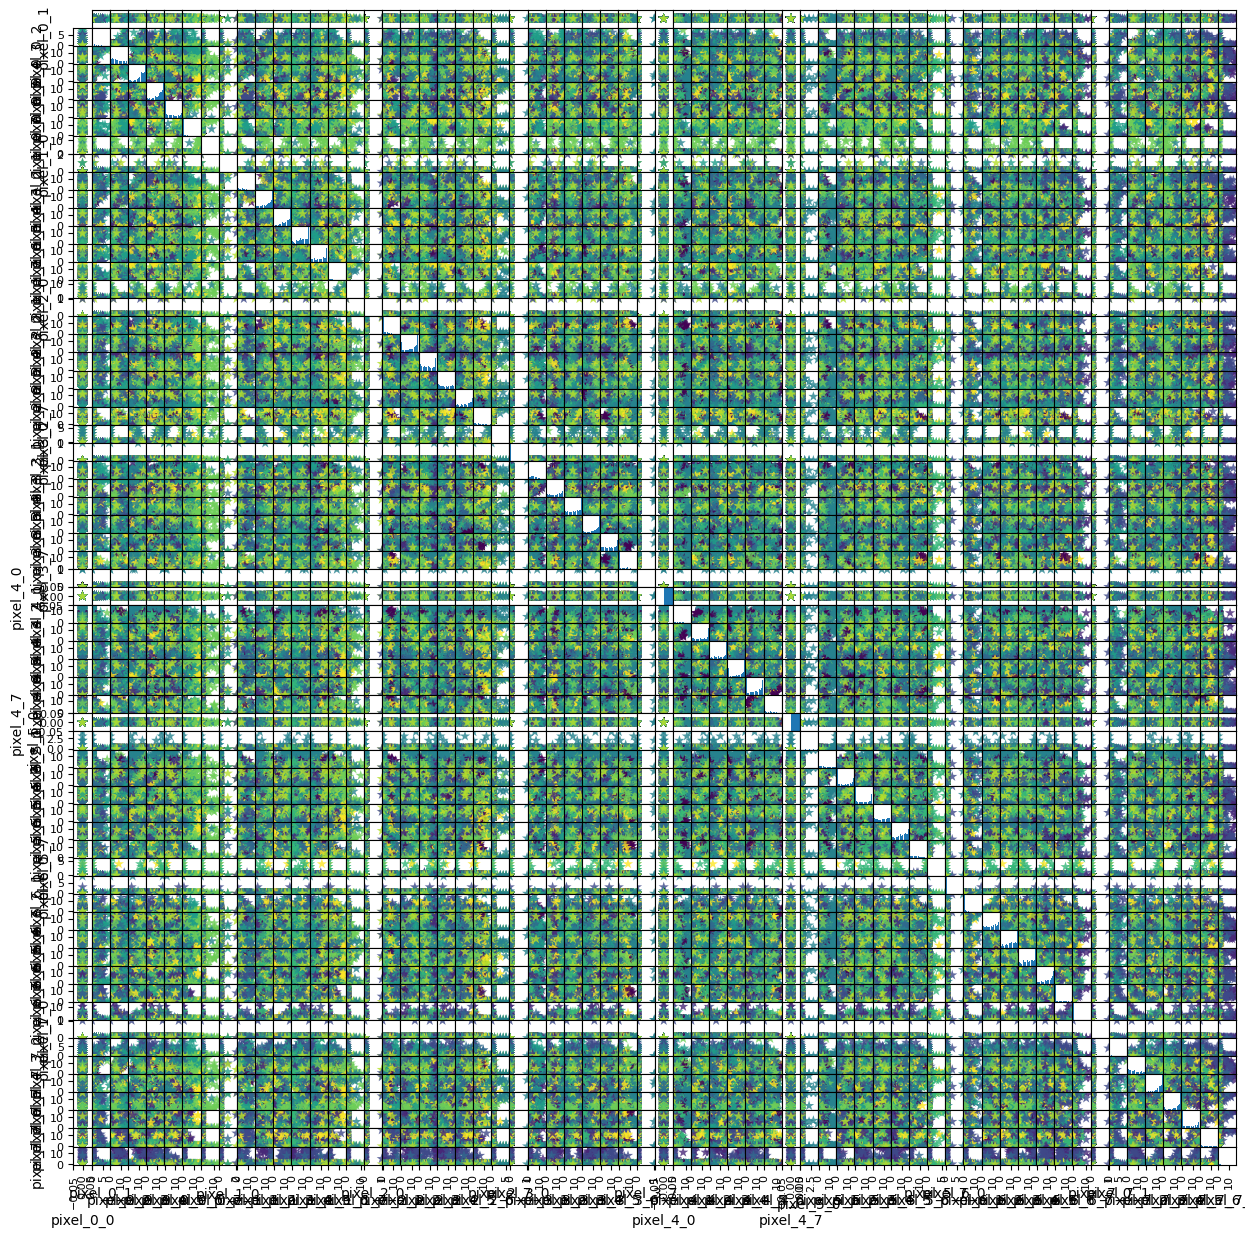

In [15]:
import pandas as pd
digits_dataframe = pd.DataFrame(X_train, columns=digits_dataset.feature_names)

grr = pd.plotting.scatter_matrix(
    digits_dataframe,
    c=y_train,
    figsize=(15,15),
    marker='*',
    hist_kwds={'bins':20},
    s=60,
    alpha=.8
)

In [16]:
print(
    digits_dataframe.head(2)
)

   pixel_0_0  pixel_0_1  pixel_0_2  pixel_0_3  pixel_0_4  pixel_0_5  \
0        0.0        3.0       13.0       16.0        9.0        0.0   
1        0.0        0.0        1.0       14.0       13.0        4.0   

   pixel_0_6  pixel_0_7  pixel_1_0  pixel_1_1  ...  pixel_6_6  pixel_6_7  \
0        0.0        0.0        0.0       10.0  ...        9.0        1.0   
1        0.0        0.0        0.0        3.0  ...        6.0        0.0   

   pixel_7_0  pixel_7_1  pixel_7_2  pixel_7_3  pixel_7_4  pixel_7_5  \
0        0.0        2.0       16.0       16.0       14.0       12.0   
1        0.0        0.0        0.0        9.0       14.0       13.0   

   pixel_7_6  pixel_7_7  
0        9.0        1.0  
1        1.0        0.0  

[2 rows x 64 columns]


In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn_3 = KNeighborsClassifier(n_neighbors=3)

In [18]:
knn_3.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [19]:
import random
arr = [random.randint(0, 17) for _ in range(64)]
arr

[5,
 4,
 11,
 13,
 4,
 9,
 8,
 13,
 4,
 12,
 9,
 5,
 13,
 0,
 3,
 11,
 14,
 0,
 5,
 7,
 15,
 7,
 6,
 4,
 10,
 15,
 12,
 6,
 1,
 6,
 6,
 6,
 14,
 16,
 0,
 4,
 9,
 12,
 1,
 12,
 12,
 13,
 9,
 17,
 0,
 4,
 17,
 17,
 15,
 7,
 16,
 6,
 15,
 7,
 4,
 6,
 16,
 9,
 1,
 3,
 7,
 2,
 14,
 9]

In [20]:
import numpy as np
X_new = np.array(arr).reshape(1, -1)

print("Форма массива X_new: {}".format(X_new.shape))

Форма массива X_new: (1, 64)


In [21]:
prediction = knn_3.predict(X_new)
print("Прогноз: {}".format(prediction))
print("Спрогнозирование метка: {}".format(
    digits_dataset['target_names'][prediction]
))

Прогноз: [0]
Спрогнозирование метка: [0]


In [22]:
y_pred = knn_3.predict(X_test)
print("Прогнозы для тестового набора:\n {}".format(y_pred))

Прогнозы для тестового набора:
 [2 8 2 6 6 7 1 9 8 5 2 8 6 6 6 6 1 0 5 8 8 7 8 4 7 5 4 9 2 9 4 7 6 8 9 4 3
 1 0 1 8 6 7 7 1 0 7 6 2 1 9 6 7 9 0 0 5 1 6 3 0 2 3 4 1 9 2 6 9 1 8 3 5 1
 2 8 2 2 9 7 2 3 6 0 5 3 7 5 1 2 9 9 3 1 7 7 4 8 5 8 5 5 2 5 9 0 7 1 4 7 3
 4 8 9 7 9 8 2 6 5 2 5 3 4 8 7 0 6 1 5 9 9 9 5 9 9 5 7 5 6 2 8 6 9 6 1 5 1
 5 9 9 1 5 3 6 1 8 9 8 7 6 7 6 5 6 0 8 8 9 3 6 1 0 4 1 6 3 8 6 7 4 9 6 3 0
 3 3 3 0 7 7 5 7 8 0 7 8 9 6 4 5 0 1 4 6 4 3 3 0 9 5 9 2 1 4 2 1 6 8 9 2 4
 9 3 7 6 2 3 3 1 6 9 3 6 3 2 2 0 7 6 1 1 9 7 2 7 8 5 5 7 5 2 2 7 2 7 5 5 7
 0 9 1 6 5 9 7 4 3 8 0 3 6 4 6 3 2 6 8 8 8 4 6 7 5 2 4 5 3 2 4 6 9 4 5 4 3
 4 6 2 9 0 1 7 2 0 9 6 0 4 2 0 7 9 8 5 7 8 2 8 4 3 7 2 6 9 1 5 1 0 8 2 5 9
 5 6 8 2 7 2 1 5 1 6 4 5 0 9 4 1 1 7 0 8 9 0 5 4 3 8 8 6 5 3 4 4 4 8 8 7 0
 9 6 3 5 2 3 0 8 3 3 1 3 3 0 0 4 6 0 7 7 6 2 0 4 4 2 3 7 8 9 8 6 8 5 6 2 2
 3 1 7 7 8 0 3 3 2 1 5 5 9 1 3 7 0 0 7 0 4 5 9 3 3 4 3 1 8 9 8 3 6 2 1 6 2
 1 7 5 5 1 9]


c:\Users\User\Desktop\big_data\venv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\User\Desktop\big_data\venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


In [23]:
print("Правильность на тестовом наборе: {:.2f}".format(np.mean(y_pred == y_test)))

Правильность на тестовом наборе: 0.99


In [24]:
print("Правильность на тестовом наборе: {:.2f}".format(knn_3.score(X_test, y_test)))

Правильность на тестовом наборе: 0.99


In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    digits_dataset['data'],
    digits_dataset['target'],
    random_state=0
)
knn_3 = KNeighborsClassifier(n_neighbors=10)
knn_3.fit(X_train, y_train)
print("Правильность на тестовом наборе: {:.2f}".format(knn_3.score(X_test, y_test)))

Правильность на тестовом наборе: 0.98


## Набор данных по распознванию вин

In [26]:
print("Ключи wine_dataset: \n{}".format(wine_dataset.keys()))

Ключи wine_dataset: 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])


In [27]:
print(wine_dataset['DESCR'][:1500] + "\n...")

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [28]:
print("Названия ответов: {}".format(wine_dataset['target_names']))

Названия ответов: ['class_0' 'class_1' 'class_2']


In [29]:
print("Название признаков \n:{}".format(wine_dataset['feature_names']))

Название признаков 
:['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [30]:
print("Тип массива data: {}".format(type(wine_dataset['data'])))

Тип массива data: <class 'numpy.ndarray'>


In [31]:
print("Форма массива data: {}".format(wine_dataset['data'].shape))

Форма массива data: (178, 13)


In [32]:
print("150 строк массива data:\n{}".format(wine_dataset['data'][:150]))

150 строк массива data:
[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.287e+01 4.610e+00 2.480e+00 ... 5.400e-01 1.860e+00 6.250e+02]
 [1.332e+01 3.240e+00 2.380e+00 ... 5.500e-01 1.620e+00 6.500e+02]
 [1.308e+01 3.900e+00 2.360e+00 ... 5.700e-01 1.330e+00 5.500e+02]]


In [33]:
print("Тип массива target: {}".format(type(wine_dataset['target'])))

Тип массива target: <class 'numpy.ndarray'>


In [34]:
print("Форма массива target: {}".format(wine_dataset['target'].shape))

Форма массива target: (178,)


In [35]:
print("Ответы:\n{}".format(wine_dataset['target']))

Ответы:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [36]:
X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(wine_dataset['data'], wine_dataset['target'], random_state=0)

In [37]:
print("Форма массива X_train_wine: {}".format(X_train_wine.shape))
print("Форма массива y_train_wine: {}".format(y_train_wine.shape))


Форма массива X_train_wine: (133, 13)
Форма массива y_train_wine: (133,)


In [38]:
print("Форма массива X_test_wine: {}".format(X_test_wine.shape))
print("Форма массива y_test_wine: {}".format(y_test_wine.shape))


Форма массива X_test_wine: (45, 13)
Форма массива y_test_wine: (45,)


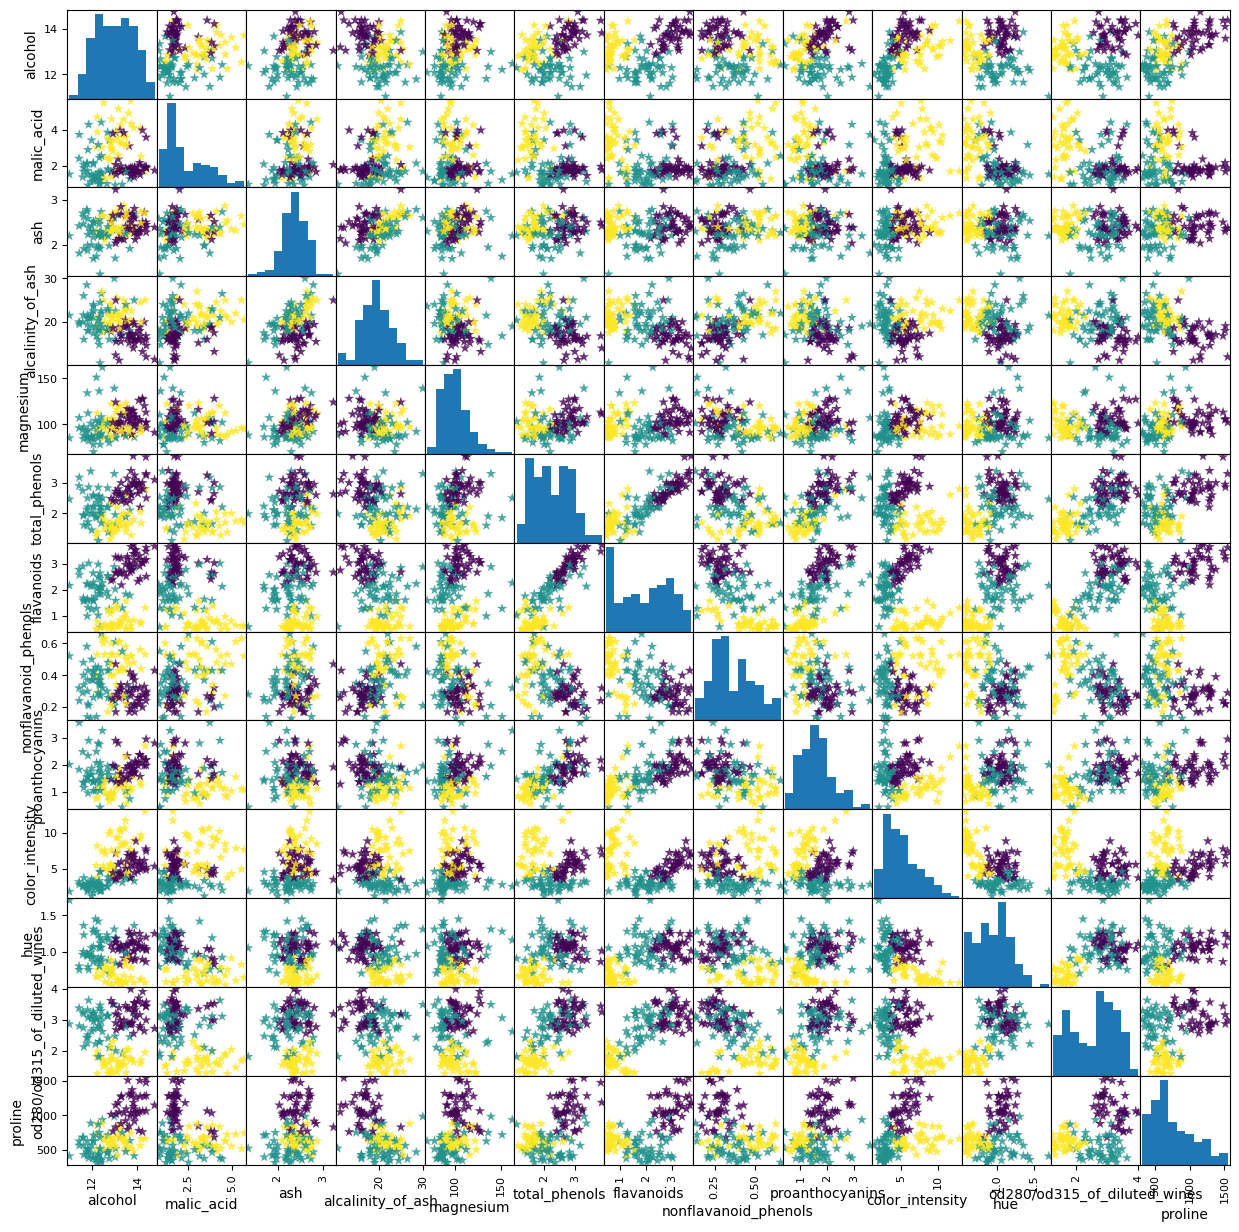

In [39]:
import pandas as pd
wine_dataframe = pd.DataFrame(X_train_wine, columns=wine_dataset.feature_names)

grr_wine = pd.plotting.scatter_matrix(
    wine_dataframe,
    c=y_train_wine,
    figsize=(15,15),
    marker='*',
    hist_kwds={'bins':10},
    s=60,
    alpha=.8
)

In [40]:
print(
    wine_dataframe.head(5)
)

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    13.64        3.10  2.56               15.2      116.0           2.70   
1    12.60        2.46  2.20               18.5       94.0           1.62   
2    11.96        1.09  2.30               21.0      101.0           3.38   
3    12.25        3.88  2.20               18.5      112.0           1.38   
4    14.30        1.92  2.72               20.0      120.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.03                  0.17             1.66             5.10  0.96   
1        0.66                  0.63             0.94             7.10  0.73   
2        2.14                  0.13             1.65             3.21  0.99   
3        0.78                  0.29             1.14             8.21  0.65   
4        3.14                  0.33             1.97             6.20  1.07   

   od280/od315_of_diluted_wines  proline  
0                  

In [41]:
knn_4 = KNeighborsClassifier(n_neighbors=4)

In [42]:
knn_4.fit(X_train_wine, y_train_wine)

KNeighborsClassifier(n_neighbors=4)

In [43]:
import numpy as np
X_new_wine = np.array([11, 4, 0.2, 10.8, 121, 0.7, 0.42, 0.64, 0.4, 11, 0.88, 5, 348]).reshape(1, -1)

print("Форма массива X_new_wine: {}".format(X_new_wine.shape))

Форма массива X_new_wine: (1, 13)


In [44]:
prediction_wine = knn_4.predict(X_new_wine)
print("Прогноз: {}".format(prediction_wine))
print("Спрогнозирование метка: {}".format(
    wine_dataset['target_names'][prediction_wine]
))

Прогноз: [1]
Спрогнозирование метка: ['class_1']


In [45]:
y_pred_wine = knn_4.predict(X_test_wine)
print("Прогнозы для тестового набора:\n {}".format(y_pred_wine))

Прогнозы для тестового набора:
 [0 1 1 0 1 1 0 1 1 1 0 1 0 2 0 1 0 0 1 0 1 0 1 1 1 1 1 1 2 2 0 0 1 0 0 1 2
 1 1 2 2 0 1 1 1]


In [46]:
print("Правильность на тестовом наборе: {:.2f}".format(np.mean(y_pred_wine == y_test_wine)))

Правильность на тестовом наборе: 0.78


In [47]:
print("Правильность на тестовом наборе: {:.2f}".format(knn_4.score(X_test_wine, y_test_wine)))

Правильность на тестовом наборе: 0.78


<h5>решил использовать 4 соседей, так как в этом случае качество модели лучше чем при одном, двух или трех</h5>

In [48]:
X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(
    wine_dataset['data'],
    wine_dataset['target'],
    random_state=0
)
knn_4 = KNeighborsClassifier(n_neighbors=4)
knn_4.fit(X_train_wine, y_train_wine)
print("Правильность на тестовом наборе: {:.2f}".format(knn_4.score(X_test_wine, y_test_wine)))

Правильность на тестовом наборе: 0.78


## Набор данных по раку груди висконсин(диагностический)

In [49]:
print("Ключи load_breast_cancer_dataset: \n{}".format(load_breast_cancer_dataset.keys()))

Ключи load_breast_cancer_dataset: 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [50]:
print(load_breast_cancer_dataset['DESCR'][:1000] + "\n...")

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [51]:
print("Названия ответов: {}".format(load_breast_cancer_dataset['target_names']))

Названия ответов: ['malignant' 'benign']


In [52]:
print("Название признаков \n:{}".format(load_breast_cancer_dataset['feature_names']))

Название признаков 
:['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [53]:
print("Тип массива data: {}".format(type(load_breast_cancer_dataset['data'])))

Тип массива data: <class 'numpy.ndarray'>


In [54]:
print("Форма массива data: {}".format(load_breast_cancer_dataset['data'].shape))

Форма массива data: (569, 30)


In [55]:
print("569 строк массива data:\n{}".format(load_breast_cancer_dataset['data'][:569]))

569 строк массива data:
[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [56]:
print("Ответы:\n{}".format(load_breast_cancer_dataset['target']))

Ответы:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 

In [57]:
X_train_cancer, X_test_cancer, y_train_cancer, y_test_cancer = train_test_split(load_breast_cancer_dataset['data'], load_breast_cancer_dataset['target'], random_state=0)

In [58]:
print("Форма массива X_train_cancer: {}".format(X_train_cancer.shape))
print("Форма массива y_train_cancer: {}".format(y_train_cancer.shape))


Форма массива X_train_cancer: (426, 30)
Форма массива y_train_cancer: (426,)


In [59]:
print("Форма массива X_test_cancer: {}".format(X_test_cancer.shape))
print("Форма массива y_test_cancer: {}".format(y_test_cancer.shape))


Форма массива X_test_cancer: (143, 30)
Форма массива y_test_cancer: (143,)


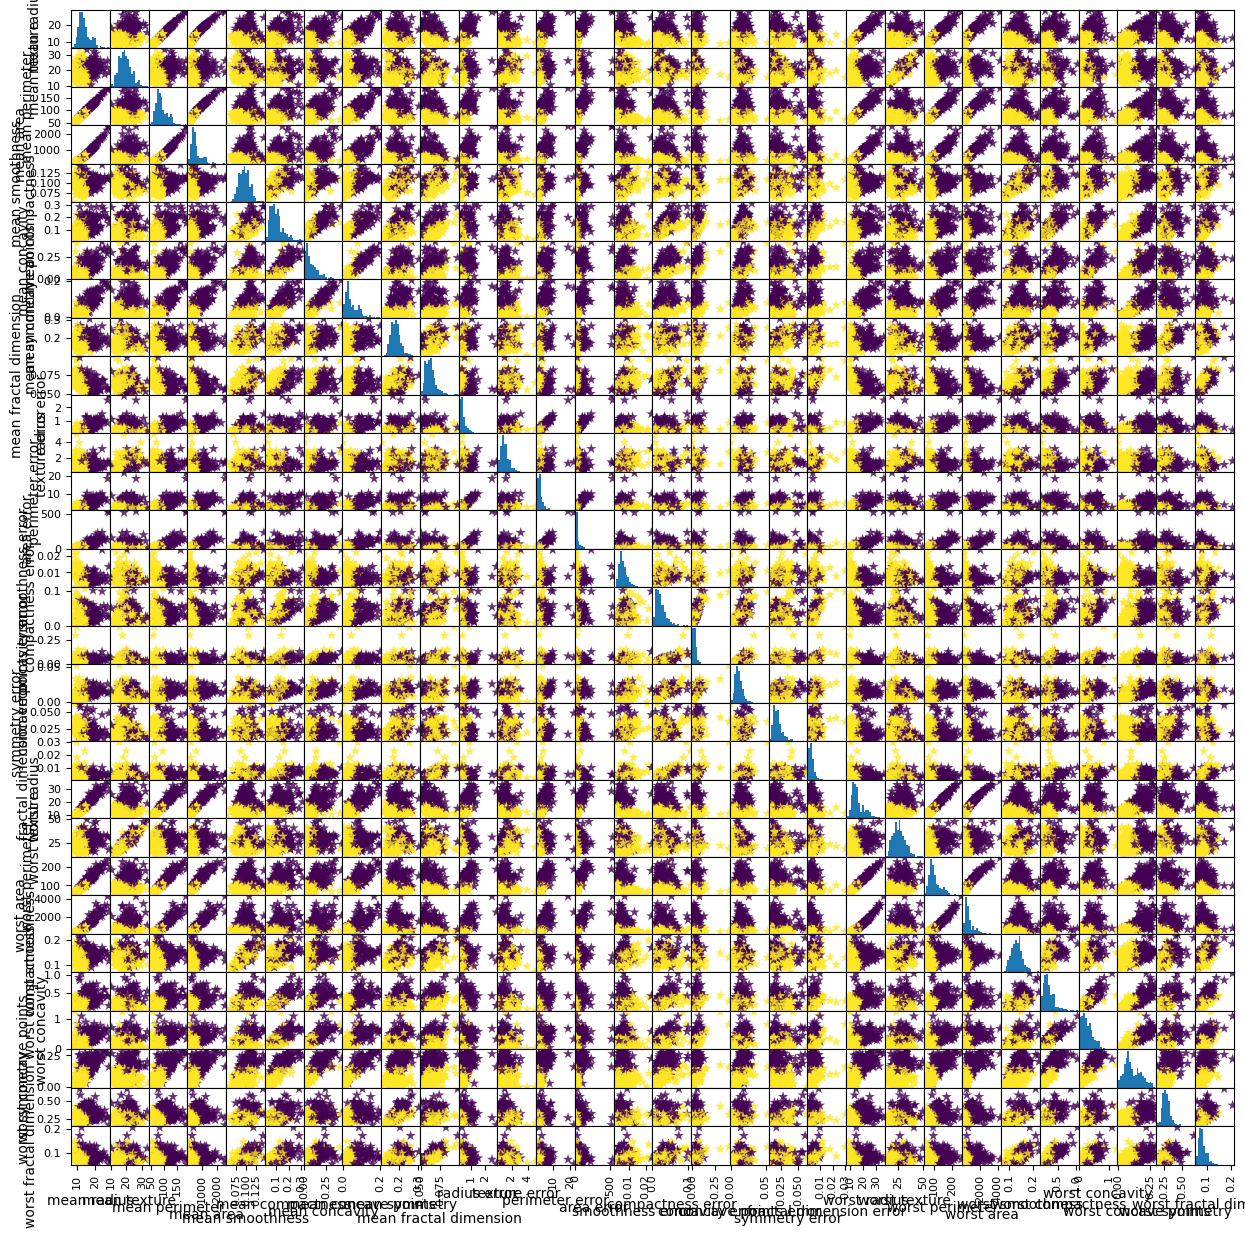

In [60]:
import pandas as pd
load_breast_cancer_dataframe = pd.DataFrame(X_train_cancer, columns=load_breast_cancer_dataset.feature_names)

grr_cancer = pd.plotting.scatter_matrix(
    load_breast_cancer_dataframe,
    c=y_train_cancer,
    figsize=(15,15),
    marker='*',
    hist_kwds={'bins':20},
    s=60,
    alpha=.8
)

In [61]:
print(
    load_breast_cancer_dataframe.head(5)
)

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        11.85         17.46           75.54      432.7          0.08372   
1        11.22         19.86           71.94      387.3          0.10540   
2        20.13         28.25          131.20     1261.0          0.09780   
3        13.59         17.84           86.24      572.3          0.07948   
4        16.69         20.20          107.10      857.6          0.07497   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.05642        0.026880             0.022800         0.1875   
1           0.06779        0.005006             0.007583         0.1940   
2           0.10340        0.144000             0.097910         0.1752   
3           0.04052        0.019970             0.012380         0.1573   
4           0.07112        0.036490             0.023070         0.1846   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0           

In [62]:
knn_2 = KNeighborsClassifier(n_neighbors=2)

In [63]:
knn_2.fit(X_train_cancer, y_train_cancer)

KNeighborsClassifier(n_neighbors=2)

In [65]:
load_breast_cancer_dataframe.to_excel("xxx.xlsx", index=False)

In [66]:
import numpy as np
X_new_cancer = np.array([10.67, 16.48, 88.23, 714.82, 0.08759, 0.05688, 0.047581, 0.032471, 0.2364, 0.88, 13.54, 
                        0.02, 0.0142, 0.0123, 0.0253, 0.0172, 0.01, 23.95, 35.83, 84.35, 475.92, 0.14, 0.18,
                        0.143, 35.23, 0.015, 0.053, 0.012, 0.43, 0.018]).reshape(1, -1)

print("Форма массива X_new_cancer: {}".format(X_new_cancer.shape))

Форма массива X_new_cancer: (1, 30)


In [67]:
prediction_cancer = knn_2.predict(X_new_cancer)
print("Прогноз: {}".format(prediction_cancer))
print("Спрогнозирование метка: {}".format(
    load_breast_cancer_dataset['target_names'][prediction_cancer]
))

Прогноз: [1]
Спрогнозирование метка: ['benign']


In [68]:
y_pred_cancer = knn_2.predict(X_test_cancer)
print("Прогнозы для тестового набора:\n {}".format(y_pred_cancer))

Прогнозы для тестового набора:
 [0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 1 0 1 0 1 0 1
 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0 1 1 0 0 0 0 0 1 1 0 1 1
 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0 1 0 0 0 0 1
 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0]


In [69]:
print("Правильность на тестовом наборе: {:.2f}".format(np.mean(y_pred_cancer == y_test_cancer)))

Правильность на тестовом наборе: 0.90


In [70]:
print("Правильность на тестовом наборе: {:.2f}".format(knn_2.score(X_test_cancer, y_test_cancer)))

Правильность на тестовом наборе: 0.90


In [71]:
X_train_cancer, X_test_cancer, y_train_cancer, y_test_cancer = train_test_split(
    load_breast_cancer_dataset['data'],
    load_breast_cancer_dataset['target'],
    random_state=0
)
knn_2 = KNeighborsClassifier(n_neighbors=2)
knn_2.fit(X_train_cancer, y_train_cancer)
print("Правильность на тестовом наборе: {:.2f}".format(knn_2.score(X_test_cancer, y_test_cancer)))

Правильность на тестовом наборе: 0.90
